In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import cifar10, mnist
from keras.layers import (BatchNormalization, Conv2D, Conv2DTranspose, Dense,
                          Dropout, Flatten, Input, Reshape, UpSampling2D,
                          ZeroPadding2D)
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model, Sequential
from keras.optimizers import Adamifar10
from keras.optimizers import Adam

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Consistent results
np.random.seed(10)

# The dimension of z
noise_dim = 100

batch_size = 16
steps_per_epoch = 3750 # 60000 / 16
epochs = 21

save_path = 'fcgan-images'

img_rows, img_cols, channels = 28, 28, 1

optimizer = Adam(0.0002, 0.5)

In [3]:
# Create path for saving images
if save_path != None and not os.path.isdir(save_path):
    os.mkdir(save_path)

In [4]:
# Load and pre-process data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize to between -1 and 1
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

x_train = x_train.reshape(-1, img_rows*img_cols*channels)

In [5]:
def create_generator():
    generator = Sequential()
    
    generator.add(Dense(256, input_dim=noise_dim))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(img_rows*img_cols*channels, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

In [6]:
def create_descriminator():
    discriminator = Sequential()
     
    discriminator.add(Dense(1024, input_dim=img_rows*img_cols*channels))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

In [7]:
discriminator = create_descriminator()
generator = create_generator()

# Make the discriminator untrainable when we are training the generator.  This doesn't effect the discriminator by itself
discriminator.trainable = False

# Link the two models to create the GAN
gan_input = Input(shape=(noise_dim,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

W1019 11:39:25.151323 140692355090240 deprecation_wrapper.py:119] From /home/evolvedsquid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1019 11:39:25.152591 140692355090240 deprecation_wrapper.py:119] From /home/evolvedsquid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1019 11:39:25.153989 140692355090240 deprecation_wrapper.py:119] From /home/evolvedsquid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1019 11:39:25.185141 140692355090240 deprecation_wrapper.py:119] From /home/evolvedsquid/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instea

In [8]:
# Display images, and save them if the epoch number is specified
def show_images(noise, epoch=None):
    generated_images = generator.predict(noise)
    plt.figure(figsize=(10, 10))
    
    for i, image in enumerate(generated_images):
        plt.subplot(10, 10, i+1)
        if channels == 1:
            plt.imshow(image.reshape((img_rows, img_cols)), cmap='gray')
        else:
            plt.imshow(image.reshape((img_rows, img_cols, channels)))
        plt.axis('off')
    
    plt.tight_layout()
    
    if epoch != None and save_path != None:
        plt.savefig(f'{save_path}/gan-images_epoch-{epoch}.png')
    plt.show()

W1019 11:39:25.286064 140692355090240 deprecation_wrapper.py:119] From /home/evolvedsquid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

/home/evolvedsquid/.local/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch: 0 	 Discriminator Loss: 0.5029089450836182 		 Generator Loss: 1.6482728719711304


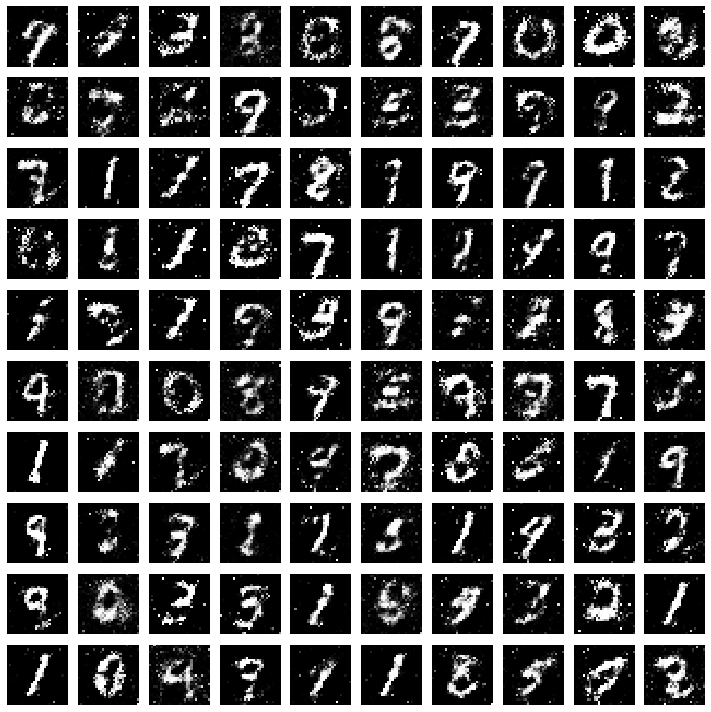

Epoch: 1 	 Discriminator Loss: 0.6153400540351868 		 Generator Loss: 1.5064165592193604
Epoch: 2 	 Discriminator Loss: 0.47730591893196106 		 Generator Loss: 1.918271780014038
Epoch: 3 	 Discriminator Loss: 0.644830048084259 		 Generator Loss: 1.5478994846343994
Epoch: 4 	 Discriminator Loss: 0.46937739849090576 		 Generator Loss: 1.8265358209609985
Epoch: 5 	 Discriminator Loss: 0.47611790895462036 		 Generator Loss: 1.6453838348388672
Epoch: 6 	 Discriminator Loss: 0.5323207378387451 		 Generator Loss: 1.509774923324585
Epoch: 7 	 Discriminator Loss: 0.5642427206039429 		 Generator Loss: 1.4234509468078613
Epoch: 8 	 Discriminator Loss: 0.6675677299499512 		 Generator Loss: 1.2507078647613525
Epoch: 9 	 Discriminator Loss: 0.5753049254417419 		 Generator Loss: 1.5761590003967285
Epoch: 10 	 Discriminator Loss: 0.5307708978652954 		 Generator Loss: 1.8455944061279297


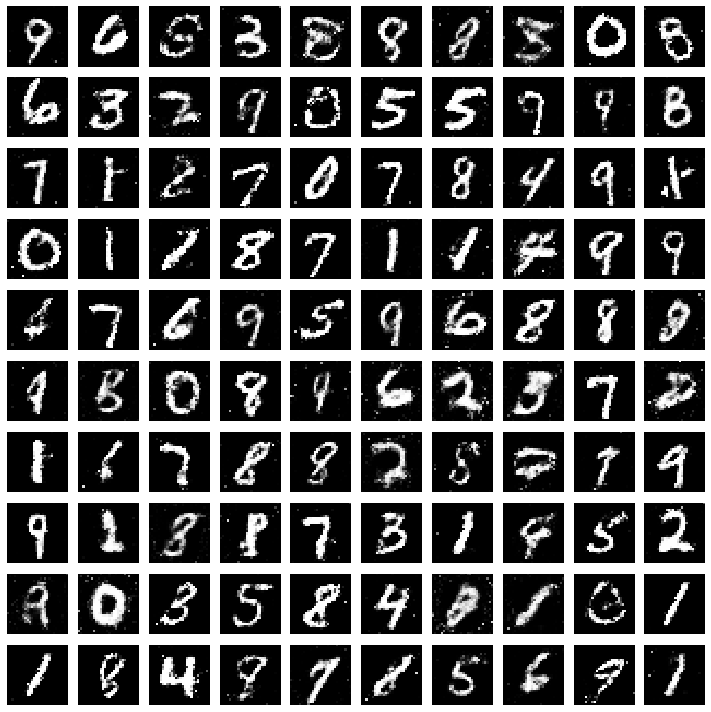

Epoch: 11 	 Discriminator Loss: 0.6897015571594238 		 Generator Loss: 1.4494390487670898
Epoch: 12 	 Discriminator Loss: 0.543919563293457 		 Generator Loss: 1.768205165863037
Epoch: 13 	 Discriminator Loss: 0.5848420262336731 		 Generator Loss: 1.2112747430801392
Epoch: 14 	 Discriminator Loss: 0.5659149885177612 		 Generator Loss: 1.5238226652145386
Epoch: 15 	 Discriminator Loss: 0.5839777588844299 		 Generator Loss: 1.497234582901001
Epoch: 16 	 Discriminator Loss: 0.6737551689147949 		 Generator Loss: 1.6887969970703125
Epoch: 17 	 Discriminator Loss: 0.5420644879341125 		 Generator Loss: 1.7327970266342163
Epoch: 18 	 Discriminator Loss: 0.4676172435283661 		 Generator Loss: 1.6155235767364502
Epoch: 19 	 Discriminator Loss: 0.5243480801582336 		 Generator Loss: 1.9650774002075195
Epoch: 20 	 Discriminator Loss: 0.5417391061782837 		 Generator Loss: 1.8224369287490845


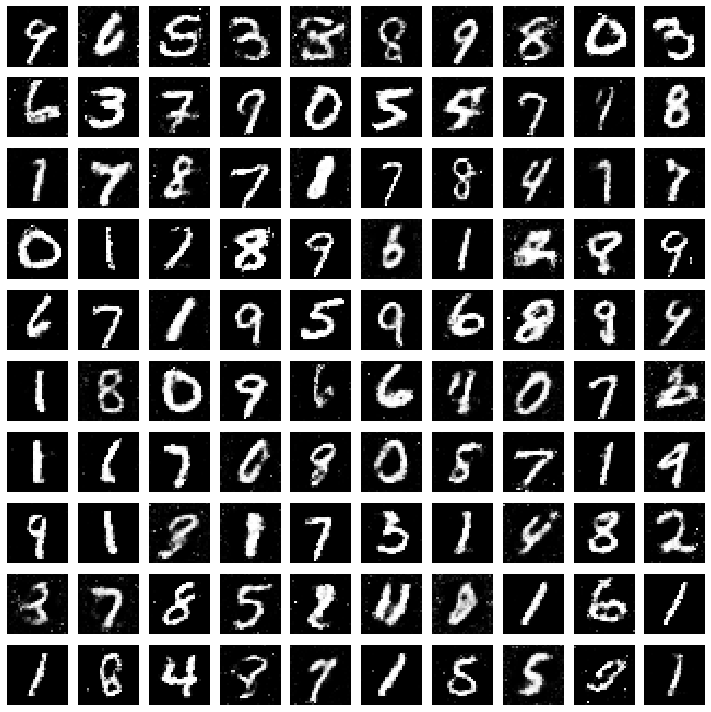

In [9]:
# Constant noise for viewing how the GAN progresses
static_noise = np.random.normal(0, 1, size=(100, noise_dim))

for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        fake_x = generator.predict(noise)

        real_x = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
        
        x = np.concatenate((real_x, fake_x))

        disc_y = np.zeros(2*batch_size)
        disc_y[:batch_size] = 0.9

        d_loss = discriminator.train_on_batch(x, disc_y)

        y_gen = np.ones(batch_size)
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f'Epoch: {epoch} \t Discriminator Loss: {d_loss} \t\t Generator Loss: {g_loss}')
    if epoch % 10 == 0:
        show_images(static_noise, epoch)

In [10]:
# Turn the training process into a GIF
from PIL import Image, ImageDraw

frames = []
for image in os.listdir(save_path):
    frames.append(Image.open(save_path + '/' + image))
frames[0].save('gan_training.gif', format='GIF', append_images=frames[1:], save_all=True, duration=500, loop=0)

discriminator.save('fcdiscriminator.hdf5')
generator.save('fcgenerator.hdf5')